# 1. Libraries and packages

Features of dataset:

1. gender: ('Female': 0, 'Male': 1)
2. age: (patient's age in years)
3. hypertension: (0 represents no history of hypertension & 1 represents history of hypertension)
4. heart_disease: (0 represents no history of heart disease & 1 represents history of heart disease)
5. ever_married: ('No': 0, 'Yes': 1)
6. work_type: ('Govt_job': 0, 'Never_worked': 1, 'Private': 2, 'Self-employed': 3, 'children': 4)
7. Residence_type: ('Rural': 0, 'Urban': 1)
8. avg_glucose_level: (numeric data to represent the average patient's glucose level)
9. bmi: (numeric data to represent Body Mass Index)
10. smoking_status: ('formerly smoked': 0, 'never smoked': 1, 'smokes': 2)

#### 5109 rows of data but there are unknown information under "smoking_status", "NaN" values under "bmi", and an anomaly of "Other" under "gender". After data cleaning, we are left with 3425 rows of data.

In [1]:
# Import general packages - numpy,pandas,seaborn,matplotlib
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set

# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy import stats
from sklearn.ensemble import RandomForestClassifier


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [2]:
# Import the data set
traindata = pd.read_csv('cleaned_data.csv')
traindata.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,0,1
1,1,80.0,0,1,1,2,0,105.92,32.5,1,1
2,0,49.0,0,0,1,2,1,171.23,34.4,2,1
3,0,79.0,1,0,1,3,0,174.12,24.0,1,1
4,1,81.0,0,0,1,2,1,186.21,29.0,0,1


# 2. Exploratory data analysis

In [3]:
categorical = ['gender', 'hypertension', 'heart_disease', 'ever_married',
'work_type', 'Residence_type', 'smoking_status', 'stroke']

numerical = ['age','avg_glucose_level', 'bmi']

## 2.1 Univariate analysis

In [4]:
# Extract only the numeric data variables
numeric_data = pd.DataFrame(traindata[numerical])
numeric_data.describe().round(2)

,age,avg_glucose_level,bmi
count,3425.00,3425.00,3425.00
mean,48.65,108.31,30.29
std,18.85,47.71,7.30
min,10.00,55.12,11.50
25%,34.00,77.23,25.30
50%,50.00,92.35,29.10
75%,63.00,116.20,34.10
max,82.00,271.74,92.00


#### Based on the mean and median score differences, we can expect

1. Slightly left skew on the 'age' (mean: 48.65 & median: 50)
2. Slightly right skew on the 'bmi' (mean: 30.29 & median: 29.10)
3. Right skew distribution on the 'avg_glucose_level' (mean: 108.31 & median: 92.35)

In [5]:
numeric_data[numerical].skew()

age                 -0.055179
avg_glucose_level    1.472870
bmi                  1.201961
dtype: float64

#### From the results, we can observe that age has a slight left skew, while the other two features have a right tail, positively skewed shape distribution.

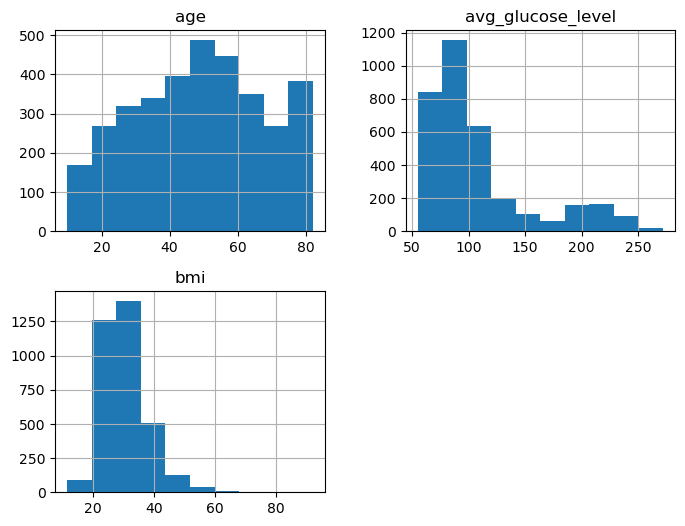

In [6]:
numeric_data[numerical].hist(figsize=(8,6));

#### As seen from the histograms, numerical features have skewness in different degrees. This aligns with what we expected above.

### 2.1.1 Gender

In [7]:
gender_counts = traindata['gender'].value_counts()
print(gender_counts)

gender
0    2086
1    1339
Name: count, dtype: int64


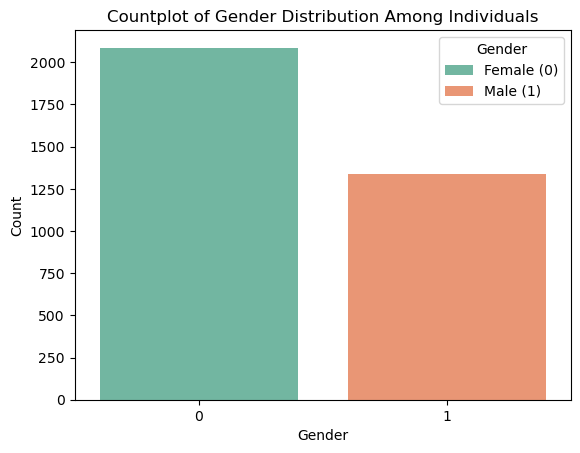

Female (0):	60.91%
Male (1):	39.09%

Column Name:	gender
Data Type:	int64


In [8]:
# Barplot to represent gender counts
ax = sb.countplot(data=traindata, x='gender', orient='h', palette='Set2')

plt.xlabel('Gender')
plt.ylabel('Count')

# Manually create legend
handles = ax.patches
labels = ['Female (0)', 'Male (1)']
plt.legend(handles, labels, title="Gender")

plt.title("Countplot of Gender Distribution Among Individuals")
plt.show()

# Print percentages of female and male
gender_counts = traindata['gender'].value_counts(normalize=True) * 100
female_percentage = gender_counts[0] if 0 in gender_counts.index else 0
male_percentage = gender_counts[1] if 1 in gender_counts.index else 0
print(f'Female (0):\t{female_percentage:.2f}%')
print(f'Male (1):\t{male_percentage:.2f}%')
print()

# Print column name and dtype
column_name = 'gender'
column_dtype = traindata[column_name].dtype
print(f"Column Name:\t{column_name}")
print(f"Data Type:\t{column_dtype}")

#### From the countplot and function value_counts(), our dataset has a higher female-to-male gender ratio of 2086 females to 1339 males. This converts to 60.91% females and 39.09% males.

### 2.1.2 Hypertension

In [9]:
hypertension_counts = traindata['hypertension'].value_counts()
print(hypertension_counts)

hypertension
0    3017
1     408
Name: count, dtype: int64


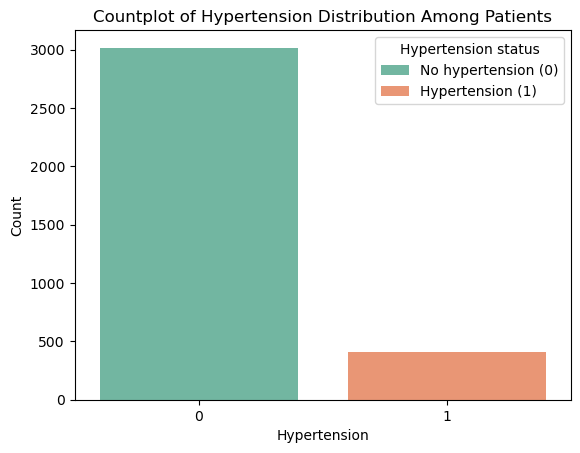

Patients without hypertension (0):	88.09%
Patients with hypertension (1):		11.91%

Column Name:	hypertension
Data Type:	int64


In [10]:
# Barplot to represent hypertension counts
ax = sb.countplot(data=traindata, x='hypertension', orient='h', palette='Set2')

plt.xlabel('Hypertension')
plt.ylabel('Count')

# Manually create legend
handles = ax.patches
labels = ['No hypertension (0)', 'Hypertension (1)']
plt.legend(handles, labels, title="Hypertension status")

plt.title("Countplot of Hypertension Distribution Among Patients")
plt.show()

# Calculate the percentage of patients with hypertension
hypertension_counts = traindata['hypertension'].value_counts(normalize=True) * 100
hypertension_percentage = hypertension_counts[1] if 1 in hypertension_counts.index else 0
no_hypertension_percentage = hypertension_counts[0] if 0 in hypertension_counts.index else 0

print(f'Patients without hypertension (0):\t{no_hypertension_percentage:.2f}%')
print(f'Patients with hypertension (1):\t\t{hypertension_percentage:.2f}%')
print()

# Print column name and dtype
column_name = 'hypertension'
column_dtype = traindata[column_name].dtype
print(f"Column Name:\t{column_name}")
print(f"Data Type:\t{column_dtype}")

#### Based on the countplot and the result of the function value_counts(), our dataset indicates that there are 408 patients with hypertension and 3017 patients without hypertension. This distribution represents approximately 11.91% and 88.09% of the total number of patients, respectively.

### 2.1.3 Heart disease

In [11]:
heartDisease_counts = traindata['heart_disease'].value_counts()
print(heartDisease_counts)

heart_disease
0    3219
1     206
Name: count, dtype: int64


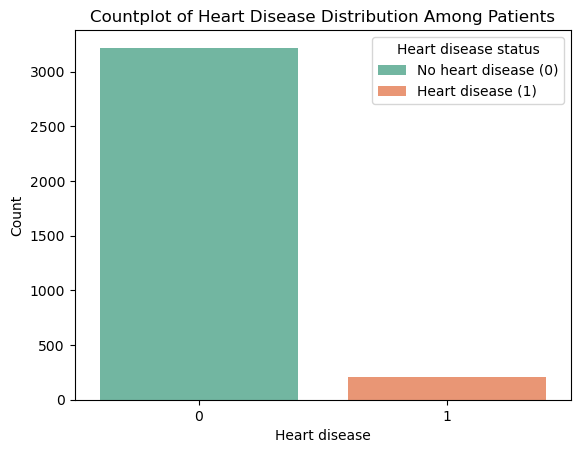

Patients without heart disease (0):	93.99%
Patients with heart disease (1):	6.01%

Column Name:	heart_disease
Data Type:	int64


In [12]:
# Barplot to represent heart disease counts
ax = sb.countplot(data=traindata, x='heart_disease', orient='h', palette='Set2')

plt.xlabel('Heart disease')
plt.ylabel('Count')

# Manually create legend
handles = ax.patches
labels = ['No heart disease (0)', 'Heart disease (1)']
plt.legend(handles, labels, title="Heart disease status")

plt.title("Countplot of Heart Disease Distribution Among Patients")
plt.show()

# Calculate the percentage of patients with hypertension
heartDisease_counts = traindata['heart_disease'].value_counts(normalize=True) * 100
heartDisease_percentage = heartDisease_counts[1] if 1 in heartDisease_counts.index else 0
no_heartDisease_percentage = heartDisease_counts[0] if 0 in heartDisease_counts.index else 0

print(f'Patients without heart disease (0):\t{no_heartDisease_percentage:.2f}%')
print(f'Patients with heart disease (1):\t{heartDisease_percentage:.2f}%')
print()

# Print column name and dtype
column_name = 'heart_disease'
column_dtype = traindata[column_name].dtype
print(f"Column Name:\t{column_name}")
print(f"Data Type:\t{column_dtype}")

#### Based on the countplot and the result of the function value_counts(), our dataset indicates that there are 206 patients with heart disease and 3219 patients without heart disease. This distribution represents approximately 6.01% and 93.99% of the total number of patients, respectively.¶

#### Majority of the people in our dataset do not have heart disease, almost 16 times more than those with heart disease.

### 2.1.4 Married

In [13]:
everMarried_counts = traindata['ever_married'].value_counts()
print(everMarried_counts)

ever_married
1    2599
0     826
Name: count, dtype: int64


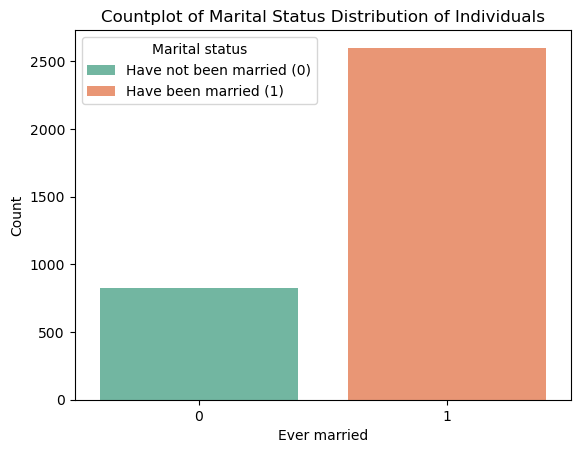

Individuals who have never been married before (0):	24.12%
Individuals who have been married before (1):		75.88%

Column Name:	ever_married
Data Type:	int64


In [14]:
# Barplot to represent ever married counts
ax = sb.countplot(data=traindata, x='ever_married', orient='h', palette='Set2')

plt.xlabel('Ever married')
plt.ylabel('Count')

# Manually create legend
handles = ax.patches
labels = ['Have not been married (0)', 'Have been married (1)']
plt.legend(handles, labels, title="Marital status")

plt.title("Countplot of Marital Status Distribution of Individuals")
plt.show()

# Calculate the percentage of patients with hypertension
everMarried_counts = traindata['ever_married'].value_counts(normalize=True) * 100
everMarried_percentage = everMarried_counts[1] if 1 in everMarried_counts.index else 0
no_everMarried_percentage = everMarried_counts[0] if 0 in everMarried_counts.index else 0

print(f'Individuals who have never been married before (0):\t{no_everMarried_percentage:.2f}%')
print(f'Individuals who have been married before (1):\t\t{everMarried_percentage:.2f}%')
print()

# Print column name and dtype
column_name = 'ever_married'
column_dtype = traindata[column_name].dtype
print(f"Column Name:\t{column_name}")
print(f"Data Type:\t{column_dtype}")

#### After examining the countplot and the outcome of the value_counts() function, it's apparent that our dataset comprises 826 individuals who have never married and 2599 individuals who have been married. This distribution roughly represents approximately 24.12% and 75.88% of the total population of individuals respectively, based on whether they have been married or not.

### 2.1.5 Work type

In [15]:
workType_counts = traindata['work_type'].value_counts().sort_index()
print(workType_counts)

work_type
0     514
1      14
2    2200
3     629
4      68
Name: count, dtype: int64


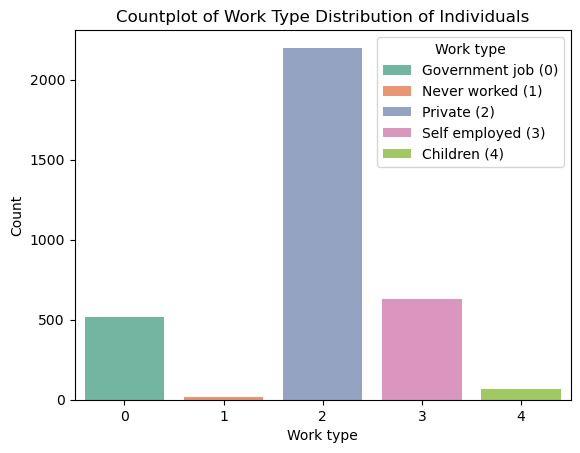

Individuals working in government sectors (0):	15.01%
Individuals who never worked (1):		0.41%
Individuals working in private sectors (2):	64.23%
Individuals who are self employed (3):		18.36%
Individuals who are children (4):		1.99%

Column Name:	work_type
Data Type:	int64


In [16]:
# Barplot to represent work type counts
ax = sb.countplot(data=traindata, x='work_type', orient='h', palette='Set2')

plt.xlabel('Work type')
plt.ylabel('Count')

# Manually create legend
handles = ax.patches
labels = ['Government job (0)', 'Never worked (1)', 'Private (2)', 'Self employed (3)', 'Children (4)']
plt.legend(handles, labels, title="Work type")

plt.title("Countplot of Work Type Distribution of Individuals")
plt.show()


# Calculate the percentage of patients with each work type
workType_counts = traindata['work_type'].value_counts(normalize=True) * 100
print(f"Individuals working in government sectors (0):\t{workType_counts.get(0, 0):.2f}%")
print(f"Individuals who never worked (1):\t\t{workType_counts.get(1, 0):.2f}%")
print(f"Individuals working in private sectors (2):\t{workType_counts.get(2, 0):.2f}%")
print(f"Individuals who are self employed (3):\t\t{workType_counts.get(3, 0):.2f}%")
print(f"Individuals who are children (4):\t\t{workType_counts.get(4, 0):.2f}%")
print()

# Print column name and dtype
column_name = 'work_type'
column_dtype = traindata[column_name].dtype
print(f"Column Name:\t{column_name}")
print(f"Data Type:\t{column_dtype}")

#### After analyzing the countplot and the results of the value_counts() function, it becomes evident that the majority of individuals in our dataset are employed in the private sector, totaling 2203 individuals, which corresponds to 64.23% of the dataset. Following this, 629 individuals, or 18.36%, are self-employed, while 514 individuals, accounting for 15.01%, work in government sectors.

### 2.1.6 Residence type

In [17]:
residenceType_counts = traindata['Residence_type'].value_counts()
print(residenceType_counts)

Residence_type
1    1745
0    1680
Name: count, dtype: int64


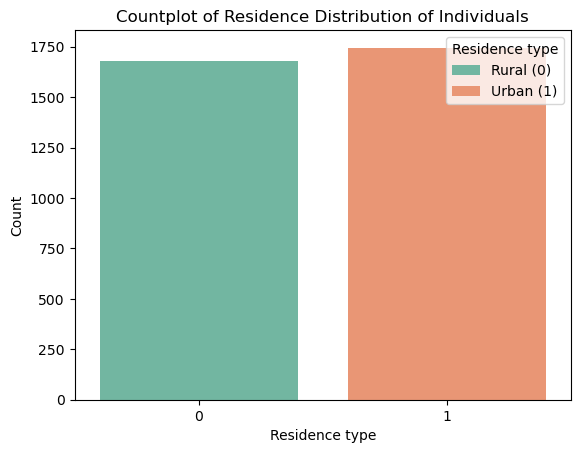

Individuals living in rural areas (0):	49.05%
Individuals living in urban areas (1):	50.95%

Column Name:	Residence_type
Data Type:	int64


In [18]:
# Barplot to represent ever married counts
ax = sb.countplot(data=traindata, x='Residence_type', orient='h', palette='Set2')

plt.xlabel('Residence type')
plt.ylabel('Count')

# Manually create legend
handles = ax.patches
labels = ['Rural (0)', 'Urban (1)']
plt.legend(handles, labels, title="Residence type")

plt.title("Countplot of Residence Distribution of Individuals")
plt.show()

# Calculate the percentage of patients with hypertension
residenceType_counts = traindata['Residence_type'].value_counts(normalize=True) * 100
urban_percentage = residenceType_counts[1] if 1 in residenceType_counts.index else 0
rural_percentage = residenceType_counts[0] if 0 in residenceType_counts.index else 0

print(f'Individuals living in rural areas (0):\t{rural_percentage:.2f}%')
print(f'Individuals living in urban areas (1):\t{urban_percentage:.2f}%')
print()

# Print column name and dtype
column_name = 'Residence_type'
column_dtype = traindata[column_name].dtype
print(f"Column Name:\t{column_name}")
print(f"Data Type:\t{column_dtype}")

#### Upon analyzing the countplot and the results of the value_counts() function, it is evident that our dataset comprises 1745 individuals residing in urban areas and 1680 individuals residing in rural areas. This distribution roughly accounts for 50.95% and 49.05% of the total population, respectively, based on residence type.

### 2.1.7 Smoking status

In [19]:
smokingStatus_counts = traindata['smoking_status'].value_counts().sort_index()
print(smokingStatus_counts)

smoking_status
0     836
1    1852
2     737
Name: count, dtype: int64


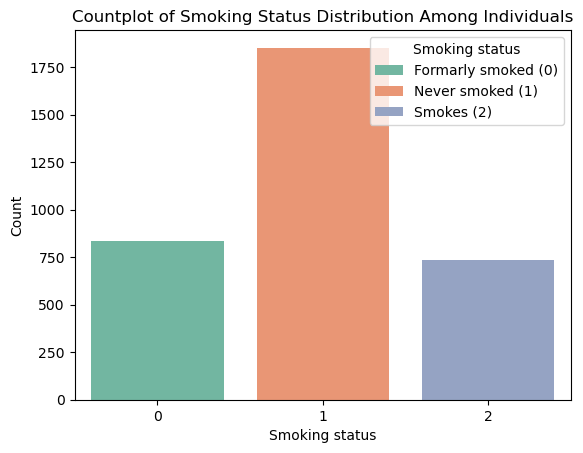

Formerly smoked (0):	24.41%
Never smoked (1):	54.07%
Smokes (2):		21.52%

Column Name:	smoking_status
Data Type:	int64


In [20]:
# Barplot to represent ever married counts
ax = sb.countplot(data=traindata, x='smoking_status', orient='h', palette='Set2')

plt.xlabel('Smoking status')
plt.ylabel('Count')

# Manually create legend
handles = ax.patches
labels = ['Formarly smoked (0)', 'Never smoked (1)', 'Smokes (2)']
plt.legend(handles, labels, title="Smoking status")

plt.title("Countplot of Smoking Status Distribution Among Individuals")
plt.show()

# Calculate the percentage of patients with each smoking status
smokingStatus_counts = traindata['smoking_status'].value_counts(normalize=True) * 100
formerly_smoked_percentage = smokingStatus_counts.get(0, 0)
never_smoked_percentage = smokingStatus_counts.get(1, 0)
smokes_percentage = smokingStatus_counts.get(2, 0)

print(f'Formerly smoked (0):\t{formerly_smoked_percentage:.2f}%')
print(f'Never smoked (1):\t{never_smoked_percentage:.2f}%')
print(f'Smokes (2):\t\t{smokes_percentage:.2f}%')
print()

# Print column name and dtype
column_name = 'smoking_status'
column_dtype = traindata[column_name].dtype
print(f"Column Name:\t{column_name}")
print(f"Data Type:\t{column_dtype}")

#### Upon analyzing the countplot and the results of the value_counts() function, it is evident that the majority of individuals in our dataset, comprising 1852 people (54.07%), have never smoked. This group constitutes the largest portion of our dataset. Additionally, 836 individuals (24.41%) are former smokers, followed by 737 individuals (21.52%) who currently smoke.

#### It is noteworthy that the number of individuals who never smoked is approximately equivalent to the sum of the number of individuals who formerly smoked and those who currently smoke.

## 2.2 Bivariate analysis

#### We will not be using doing bivariate analysis for 'Residence_type' and 'work_type' features as they are irrelevant in predicting strokes.

### 2.2.1 Exploring the relationship between 'hypertension' and 'stroke'

In [21]:
pd.crosstab(traindata.stroke, traindata.hypertension)

hypertension,0,1
stroke,,
0,2894,351
1,123,57


In [22]:
pd.crosstab(traindata.stroke, traindata.hypertension, normalize='columns')

hypertension,0,1
stroke,,
0,0.959231,0.860294
1,0.040769,0.139706


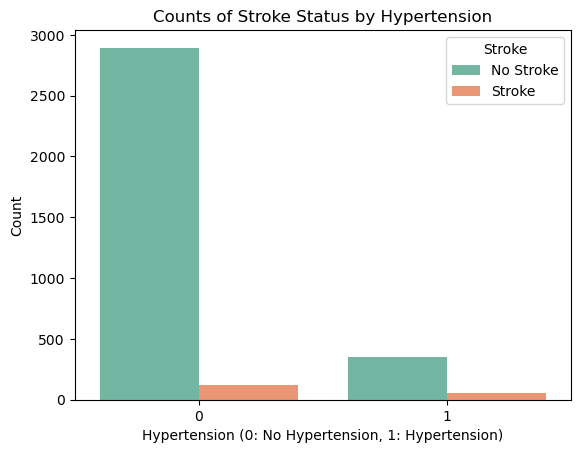

In [23]:
# Create a bar plot of hypertension vs non-hypertension with stroke status
sb.countplot(x='hypertension', data=traindata, hue='stroke', palette='Set2')
plt.title("Counts of Stroke Status by Hypertension")
plt.ylabel('Count')
plt.xlabel('Hypertension (0: No Hypertension, 1: Hypertension)')
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'], loc='upper right')
plt.show()

In [24]:
# Probability of stroke for individuals with and without hypertension
stroke_probability_hypertension = traindata[traindata["hypertension"] == 1]["stroke"].mean() * 100
stroke_probability_no_hypertension = traindata[traindata["hypertension"] == 0]["stroke"].mean() * 100

print(f"A person with hypertension has a probability of {round(stroke_probability_hypertension, 2)}% to get a stroke.")
print(f"A person without hypertension has a probability of {round(stroke_probability_no_hypertension, 2)}% to get a stroke.")

A person with hypertension has a probability of 13.97% to get a stroke.
A person without hypertension has a probability of 4.08% to get a stroke.


#### Based on the analysis of the countplot, it can be inferred that there is a strong correlation between 'hypertension' and 'stroke'. The probability of an individual with hypertension experiencing a stroke is approximately 13.97%, whereas the probability for an individual without hypertension is approximately 4.08%. This suggests a potential association, indicating that individuals with a history of hypertension may have a higher likelihood of experiencing a stroke.

#### In other words, a person with hypertension is 3.4 times more likely to get a stroke than those who do not have hypertension. Hence, we can conclude that high blood pressure (hypertension) increases the likelihood of a stroke.

### 2.2.2 Exploring the relationship between 'gender' and 'stroke'

In [25]:
pd.crosstab(traindata.stroke, traindata.gender)

gender,0,1
stroke,,
0,1981,1264
1,105,75


In [26]:
pd.crosstab(traindata.stroke, traindata.gender, normalize='columns')

gender,0,1
stroke,,
0,0.949664,0.943988
1,0.050336,0.056012


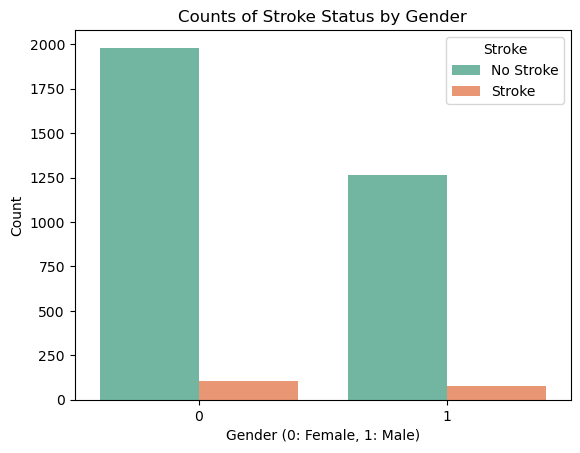

In [27]:
# Create a bar plot of gender with stroke status
sb.countplot(x='gender', data=traindata, hue='stroke', palette='Set2')
plt.title("Counts of Stroke Status by Gender")
plt.ylabel('Count')
plt.xlabel('Gender (0: Female, 1: Male)')
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'], loc='upper right')
plt.show()

In [28]:
# Probability of stroke for each gender
stroke_probability_female = traindata[traindata["gender"] == 0]["stroke"].mean() * 100
stroke_probability_male = traindata[traindata["gender"] == 1]["stroke"].mean() * 100

print(f"The probability of a female having a stroke is {round(stroke_probability_female, 2)}%.")
print(f"The probability of a male having a stroke is {round(stroke_probability_male, 2)}%.")

The probability of a female having a stroke is 5.03%.
The probability of a male having a stroke is 5.6%.


#### Based on the analysis from the countplot, it appears that there is no significant correlation between 'gender' and 'stroke'. While the probability of a female individual experiencing a stroke is 5.03%, slightly lower than the probability of a male experiencing a stroke, which is 5.6%, the difference between these probabilities is relatively small. Therefore, gender alone may not be a reliable determinant for the likelihood of experiencing a stroke. Further investigation into additional factors may be necessary to better understand the risk factors associated with stroke.

### 2.2.3 Exploring the relationship between 'heart_disease' and 'stroke'

In [29]:
pd.crosstab(traindata.stroke, traindata.heart_disease)

heart_disease,0,1
stroke,,
0,3075,170
1,144,36


In [30]:
pd.crosstab(traindata.stroke, traindata.heart_disease, normalize='columns')

heart_disease,0,1
stroke,,
0,0.955266,0.825243
1,0.044734,0.174757


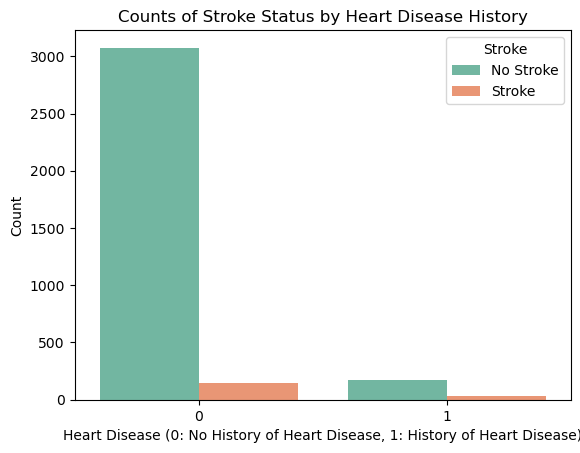

In [31]:
# Create a bar plot of heart disease with stroke status
sb.countplot(x='heart_disease', data=traindata, hue='stroke', palette='Set2')
plt.title("Counts of Stroke Status by Heart Disease History")
plt.ylabel('Count')
plt.xlabel('Heart Disease (0: No History of Heart Disease, 1: History of Heart Disease)')
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'], loc='upper right')
plt.show()

In [32]:
# Probability of stroke for individuals with and without heart disease
stroke_probability_with_heart_disease = traindata[traindata["heart_disease"] == 1]["stroke"].mean() * 100
stroke_probability_without_heart_disease = traindata[traindata["heart_disease"] == 0]["stroke"].mean() * 100

print(f"The probability of having a stroke for individuals with heart disease is {round(stroke_probability_with_heart_disease, 2)}%.")
print(f"The probability of having a stroke for individuals without heart disease is {round(stroke_probability_without_heart_disease, 2)}%.")

The probability of having a stroke for individuals with heart disease is 17.48%.
The probability of having a stroke for individuals without heart disease is 4.47%.


#### Based on our analysis from the countplot, it appears that there is a significant correlation between 'heart_disease' and 'stroke'. The probability of having a stroke for individuals with heart disease is 17.48%, which is notably higher than the probability of having a stroke for individuals without heart disease, which stands at 4.47%. This suggests that individuals with heart disease are approximately 3.9 times more likely to suffer from a stroke compared to those without heart disease.

### 2.2.4 Exploring the relationship between 'ever_married' and 'stroke'

In [33]:
# Removing people under 20 years old
everMarried_stroke_data = traindata[traindata.age >= 20]

#### Based on our research of the median marital age, we discovered that people who got married between 1950 to 1970 were around 23 years old for males and 20 years old for females. The reason we looked at past data was because our dataset consists of people aged up to 82 years old which could fall within this median marital age. Hence, we removed the people under 20 years old because they are probably not married before that.

In [34]:
pd.crosstab(everMarried_stroke_data.stroke, everMarried_stroke_data.ever_married)

ever_married,0,1
stroke,,
0,580,2436
1,20,160


In [35]:
pd.crosstab(everMarried_stroke_data.stroke, everMarried_stroke_data.ever_married, normalize='columns')

ever_married,0,1
stroke,,
0,0.966667,0.938367
1,0.033333,0.061633


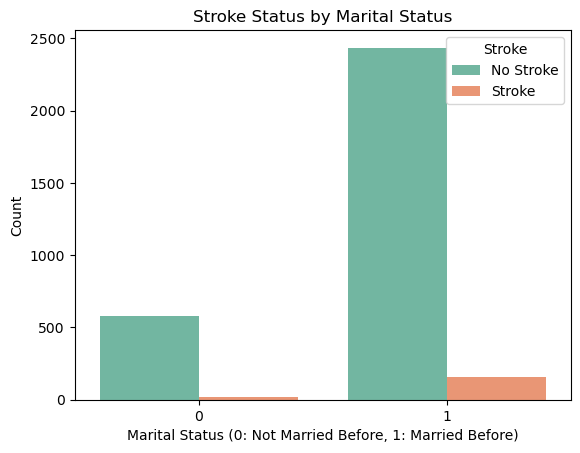

In [36]:
# Create a bar plot of marital status with stroke status
sb.countplot(x='ever_married', data=everMarried_stroke_data, hue='stroke', palette='Set2')
plt.title("Stroke Status by Marital Status")
plt.ylabel('Count')
plt.xlabel('Marital Status (0: Not Married Before, 1: Married Before)')
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'], loc='upper right')
plt.show()

In [37]:
# Probability of stroke for individuals with their marital status
stroke_probability_ever_married = everMarried_stroke_data[everMarried_stroke_data["ever_married"] == 1]["stroke"].mean() * 100
stroke_probability_not_ever_married = everMarried_stroke_data[everMarried_stroke_data["ever_married"] == 0]["stroke"].mean() * 100

print(f"The probability of having a stroke for individuals who have ever been married is {round(stroke_probability_ever_married, 2)}%.")
print(f"The probability of having a stroke for individuals who have never been married is {round(stroke_probability_not_ever_married, 2)}%.")

The probability of having a stroke for individuals who have ever been married is 6.16%.
The probability of having a stroke for individuals who have never been married is 3.33%.


#### From our analysis of the countplot, it's evident that there exists a notable correlation between 'ever_married' and 'stroke'. Individuals who have been married or are currently married demonstrate a higher probability of experiencing a stroke, with 6.16%, compared to those who have never been married, which stands at 3.33%. This indicates that married individuals are roughly 1.8 times more likely to suffer from a stroke compared to those who have never been married.

#### However, it's crucial to note that while there appears to be a correlation between these two features, marital status alone might not be the sole determinant of stroke risk. Other factors, such as age and overall health condition, could also play significant roles. For instance, married individuals may tend to be older, and with age, the likelihood of experiencing health issues, including stroke, may increase. Therefore, it's important to consider these factors collectively rather than attributing stroke risk solely to marital status.

### 2.2.5 Exploring the relationship between 'smoking_status' and 'stroke'

In [38]:
pd.crosstab(traindata.stroke, traindata.smoking_status)

smoking_status,0,1,2
stroke,,,
0,779,1768,698
1,57,84,39


In [39]:
pd.crosstab(traindata.stroke, traindata.smoking_status, normalize='columns')

smoking_status,0,1,2
stroke,,,
0,0.931818,0.954644,0.947083
1,0.068182,0.045356,0.052917


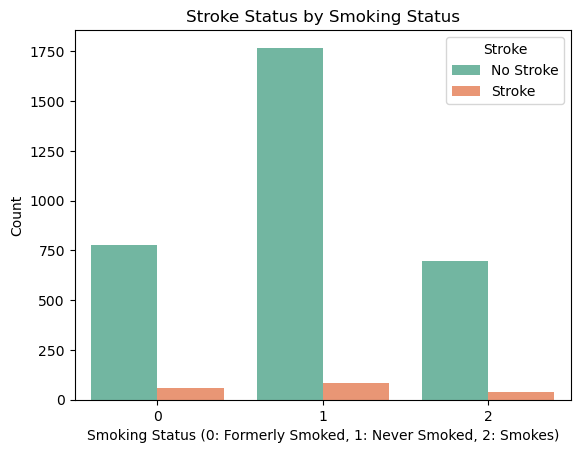

In [40]:
# Create a bar plot of marital status with stroke status
sb.countplot(x='smoking_status', data=traindata, hue='stroke', palette='Set2')
plt.title("Stroke Status by Smoking Status")
plt.ylabel('Count')
plt.xlabel('Smoking Status (0: Formerly Smoked, 1: Never Smoked, 2: Smokes)')
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'], loc='upper right')
plt.show()

In [41]:
# Probability of stroke for individuals with their smoking status
stroke_probability_formerly_smoked = traindata[traindata["smoking_status"] == 0]["stroke"].mean() * 100
stroke_probability_never_smoked = traindata[traindata["smoking_status"] == 1]["stroke"].mean() * 100
stroke_probability_smokes = traindata[traindata["smoking_status"] == 2]["stroke"].mean() * 100

print(f"The probability of having a stroke for individuals who formerly smoked is {round(stroke_probability_formerly_smoked, 2)}%.")
print(f"The probability of having a stroke for individuals who never smoked is {round(stroke_probability_never_smoked, 2)}%.")
print(f"The probability of having a stroke for individuals who currently smoke is {round(stroke_probability_smokes, 2)}%.")

The probability of having a stroke for individuals who formerly smoked is 6.82%.
The probability of having a stroke for individuals who never smoked is 4.54%.
The probability of having a stroke for individuals who currently smoke is 5.29%.


#### Based on the countplot, there appears to be a positive association between 'smoking_status' and 'stroke'. Individuals who formerly smoked have a stroke probability of 6.82%, while those who currently smoke have a probability of 5.29%. Combined, these groups exhibit a total probability of stroke at 12.11%. In contrast, individuals who have never smoked show a lower stroke probability of 4.54%. This suggests that smokers have a 2.6 times higher likelihood of experiencing a stroke compared to non-smokers.


#### It is evident that smoking is harmful for our health and can contribute to many diseases overtime. There are several reasons why individual who smoke have a higher likelihood of experiencing stroke. This could be due to the increase in blood pressure in smokers, which is a significant risk factor for stroke. Nicotine in tobacco can cause blood vessels to constrict, raising blood pressure levels over time. This is prevalent in those who formerly smoked as well. The cumulative effects of smoking for many years increases the risk of stroke due to the prolonged exposure to harmful substances in tobacco smoke.

### 2.2.6 Exploring the relationship between 'age' and 'stroke'

In [42]:
traindata['age'].describe()

count    3425.000000
mean       48.652555
std        18.850018
min        10.000000
25%        34.000000
50%        50.000000
75%        63.000000
max        82.000000
Name: age, dtype: float64

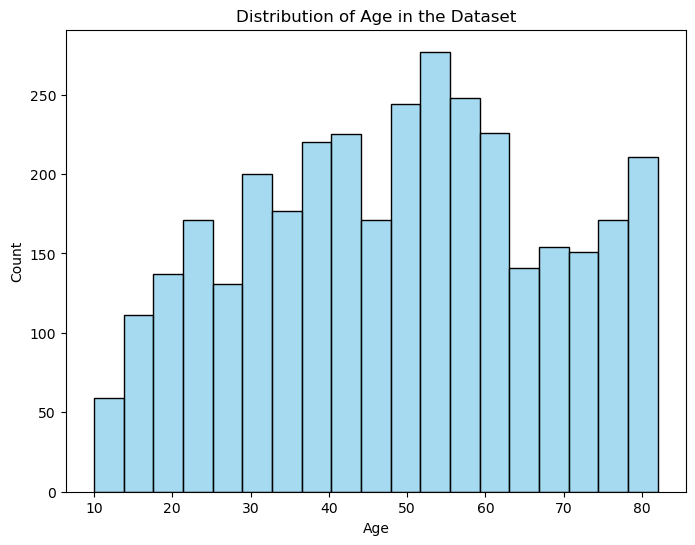

In [75]:
plt.figure(figsize=(8, 6))
sb.histplot(traindata['age'], kde=False, color='skyblue')
plt.title("Distribution of Age in the Dataset")
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

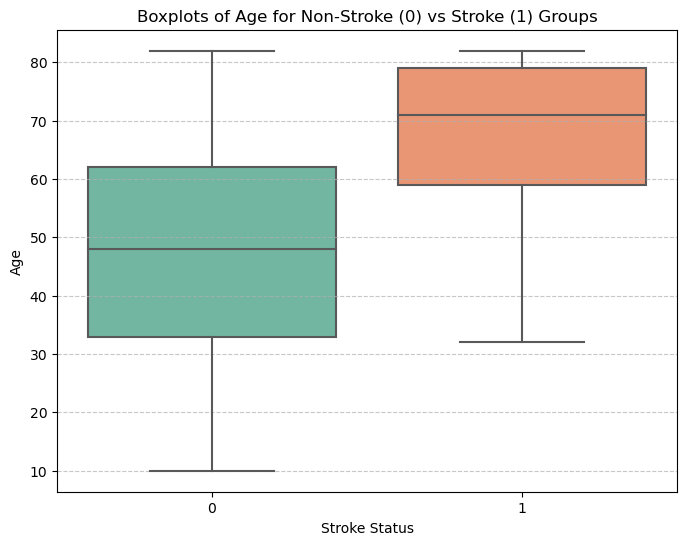

The median age of individuals with stroke is: 71.0
The median age of individuals without stroke is: 48.0


In [74]:
plt.figure(figsize=(8, 6))
sb.boxplot(data=traindata, x='stroke', y='age', palette='Set2')
plt.title("Boxplots of Age for Non-Stroke (0) vs Stroke (1) Groups")
plt.xlabel('Stroke Status')
plt.ylabel('Age')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Calculate the median age for stroke and non-stroke groups
median_age_stroke = traindata[traindata['stroke'] == 1]['age'].median()
median_age_non_stroke = traindata[traindata['stroke'] == 0]['age'].median()

print(f"The median age of individuals with stroke is: {median_age_stroke}")
print(f"The median age of individuals without stroke is: {median_age_non_stroke}")

Analyzing the boxplot comparing patients with stroke (1) and those without (0), several key insights emerge. Firstly, the median age of patients with stroke stands at 71 years, notably higher than the median age of non-stroke patients, which is 48 years. This stark difference suggests that individuals aged over 70 years have a substantially elevated risk of experiencing a stroke.

Furthermore, an intriguing observation arises from comparing the interquartile ranges (IQR) of the two groups. The first quartile (Q1) of stroke patients' ages closely aligns with the third quartile (Q3) of non-stroke patients' ages. Essentially, approximately 75% of stroke patients are aged above 59 years, while 75% of non-stroke patients fall below 62 years. This finding implies that individuals aged 59 years and older may face an increased susceptibility to stroke.

Consequently, these findings highlights that stroke manifests as an age-related ailment, compounded by potential lifestyle factors. The correlation between advancing age and stroke risk underscores the importance of age-awareness in stroke prevention strategies.

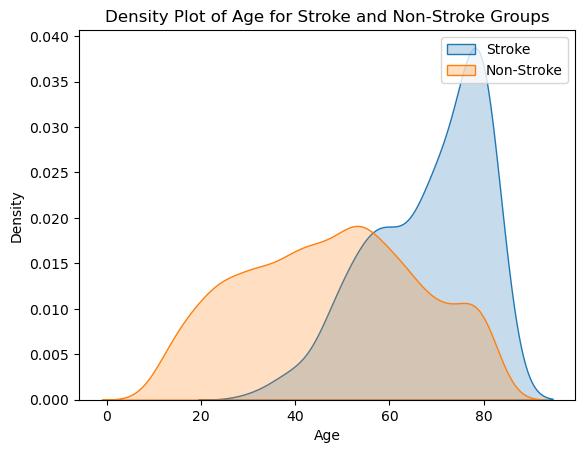

In [46]:
stroke_data = traindata[traindata['stroke'] == 1]
non_stroke_data = traindata[traindata['stroke'] == 0]

# Plot overlapping density plots for the age variable
sb.kdeplot(stroke_data['age'], label='Stroke', fill=True)
sb.kdeplot(non_stroke_data['age'], label='Non-Stroke', fill=True)

plt.title('Density Plot of Age for Stroke and Non-Stroke Groups')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(loc='upper right')
plt.show()

The density plot above illustrates the relationship between age and the likelihood of stroke occurrence, distinguishing between non-stroke (orange) and stroke (blue) groups. A notable observation is the wider span of the curve for non-stroke individuals, extending from approximately 20 to over 80 years old. This wider distribution suggests a greater diversity in ages among individuals without stroke.

Additionally, the curve for non-stroke patients exhibits a rightward skew, indicating that a substantial portion of individuals experiencing stroke are older in age. Particularly, there is a noticeable rise of the curve at around age 62, suggesting a concentration of stroke cases among individuals aged 62 and above. 

Furthermore, the density plot reveals a prominent peak at 76 years old, signifying the age at which stroke occurrence is most prevalent. Beyond this peak, the density plot sharply declines, indicating a reduced prevalence of stroke among individuals aged over 76 years. 

In essence, the density plot underscores the age-related nature of stroke incidence, with older individuals exhibiting a heightened vulnerability to experiencing stroke.

### 2.2.7 Exploring the relationship between 'avg_glucose_level' and 'stroke'

In [47]:
traindata['avg_glucose_level'].describe()

count    3425.000000
mean      108.311670
std        47.706754
min        55.120000
25%        77.230000
50%        92.350000
75%       116.200000
max       271.740000
Name: avg_glucose_level, dtype: float64

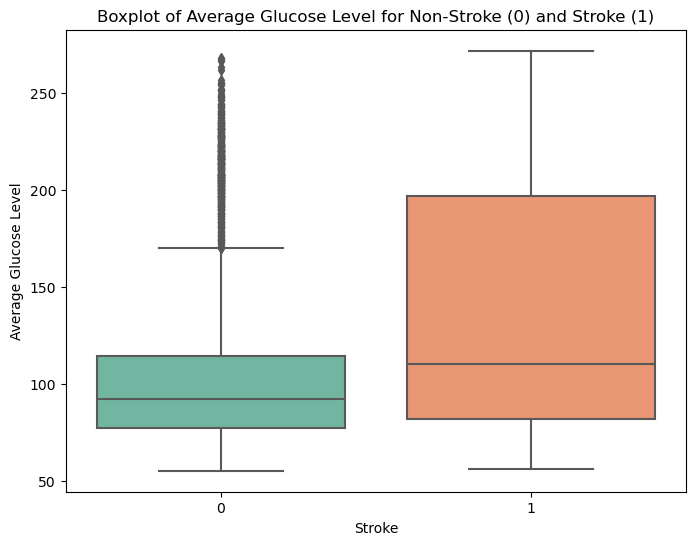

In [48]:
plt.figure(figsize=(8, 6))
sb.boxplot(data=traindata, x='stroke', y='avg_glucose_level', palette='Set2')

plt.title('Boxplot of Average Glucose Level for Non-Stroke (0) and Stroke (1)')
plt.xlabel('Stroke')
plt.ylabel('Average Glucose Level')
plt.show()

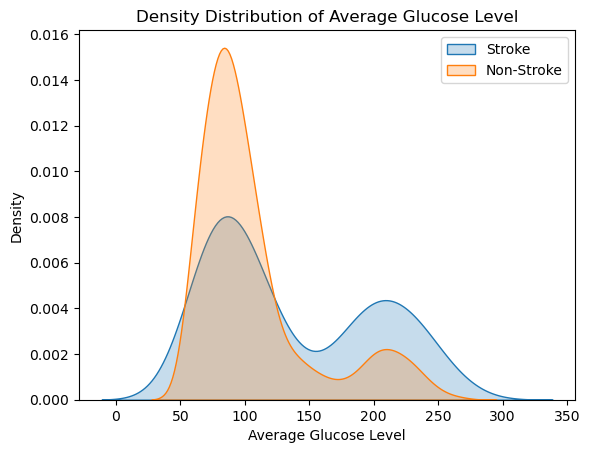

In [49]:

stroke_data = traindata[traindata['stroke'] == 1]
non_stroke_data = traindata[traindata['stroke'] == 0]

# Plot overlapping density plots for the avg_glucose_level variable
sb.kdeplot(stroke_data['avg_glucose_level'], label='Stroke', fill=True)
sb.kdeplot(non_stroke_data['avg_glucose_level'], label='Non-Stroke', fill=True)

plt.title('Density Distribution of Average Glucose Level')
plt.xlabel('Average Glucose Level')
plt.ylabel('Density')
plt.legend(loc='upper right')
plt.show()

In [50]:
stroke_summary = traindata.groupby('stroke')['avg_glucose_level'].agg(['mean', 'median', 'std'])
print(stroke_summary)

              mean  median        std
stroke                               
0       106.733082   91.88  46.197133
1       136.770111  110.16  63.230968


Based on the boxplot and stroke summary provided, it is evident that individuals who experienced a stroke have a higher average median glucose level (110.16) compared to those who did not have a stroke (91.88). This suggests a notable correlation between an individual's average glucose level and the occurrence of stroke.

### 2.2.8 Exploring relationship between 'bmi' and 'stroke'

In [51]:
traindata['bmi'].describe()

count    3425.000000
mean       30.292350
std         7.295778
min        11.500000
25%        25.300000
50%        29.100000
75%        34.100000
max        92.000000
Name: bmi, dtype: float64

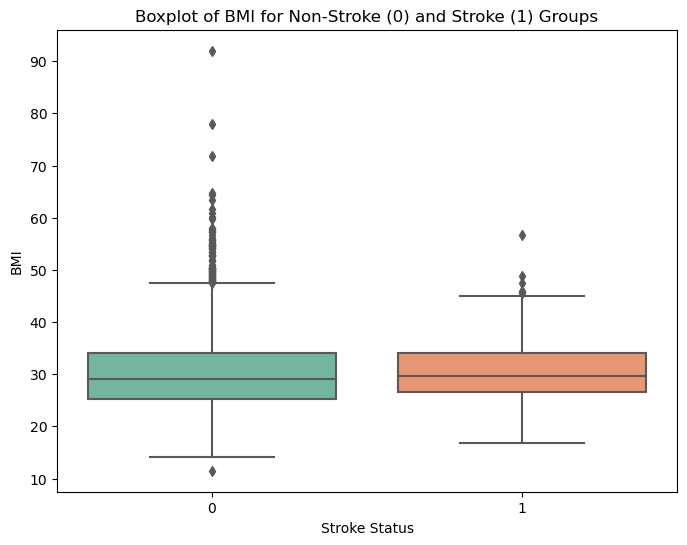

In [52]:
plt.figure(figsize=(8, 6))
sb.boxplot(data=traindata, x='stroke', y='bmi', palette='Set2')

plt.title('Boxplot of BMI for Non-Stroke (0) and Stroke (1) Groups')
plt.xlabel('Stroke Status')
plt.ylabel('BMI')

plt.show()

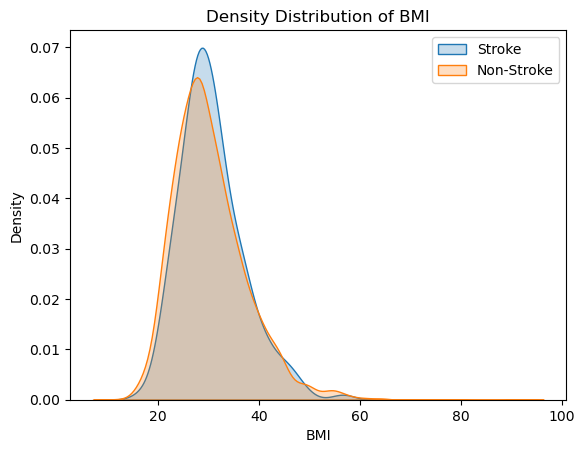

In [53]:
stroke_data = traindata[traindata['stroke'] == 1]
non_stroke_data = traindata[traindata['stroke'] == 0]

# Plot overlapping density plots for the avg_glucose_level variable
sb.kdeplot(stroke_data['bmi'], label='Stroke', fill=True)
sb.kdeplot(non_stroke_data['bmi'], label='Non-Stroke', fill=True)

plt.title('Density Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.legend(loc='upper right')
plt.show()

In [54]:
bmi_summary = traindata.groupby('stroke')['bmi'].agg(['mean', 'median', 'std'])
print(bmi_summary)

             mean  median       std
stroke                             
0       30.272419   29.00  7.346804
1       30.651667   29.75  6.312526


From the boxplot comparing the body mass index (BMI) of individuals with and without stroke, there appears to be no notable correlation between BMI and stroke occurrence. The average median BMI values for both groups are quite similar, with values of approximately 29 for non-stroke individuals and 29.75 for those who have had a stroke.

Additionally, it's worth noting that the non-stroke group exhibits a higher prevalence of outliers with high BMI values.

This suggests that while BMI may not be a determining factor for stroke occurrence, the presence of outliers with high BMI in the non-stroke group could warrant further investigation into potential risk factors associated with elevated BMI.

### 2.2.9 Feature importance between each factor and 'stroke'

In [55]:
categorical_factors = traindata[['gender', 'hypertension', 'heart_disease', 'ever_married', 'smoking_status']]

numerical_factors = traindata[['age','avg_glucose_level', 'bmi']]

stroke = traindata['stroke']

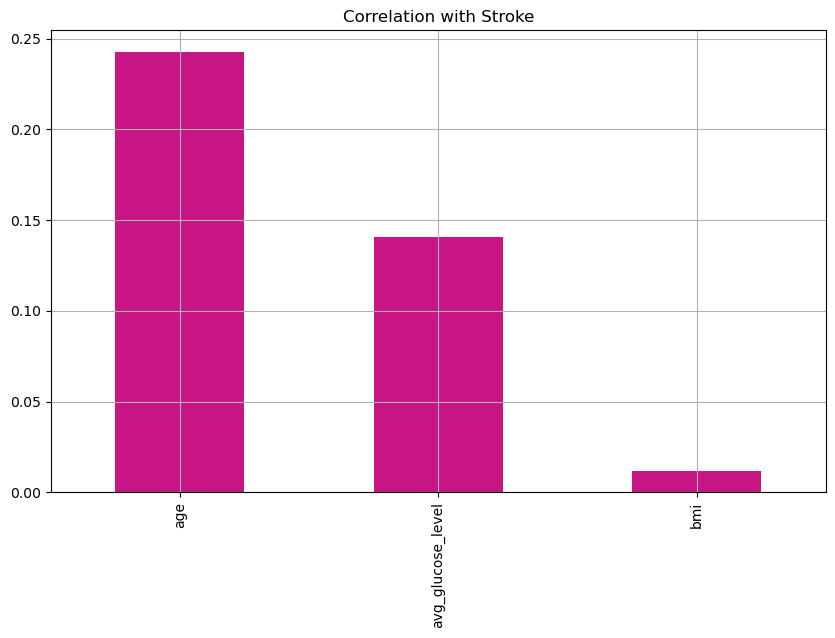

In [56]:
numerical_factors.corrwith(traindata.stroke).plot(kind='bar', grid=True, figsize=(10, 6), title="Correlation with Stroke",color="mediumvioletred");

In [57]:
from scipy.stats import chi2_contingency

#Perform chi-square test for each of the categorical variable 
for col in categorical_factors.columns:
    observed = pd.crosstab(categorical_factors[col], stroke)
    chi2, p, dof, expected = chi2_contingency(observed)
    print(col)
    print('Chi-square test statistic:', chi2)
    print('p-value:', p)
    print('Degrees of freedom:', dof)
    print('Expected values:', expected)
    print()

gender
Chi-square test statistic: 0.4198854864672281
p-value: 0.5169941898164226
Degrees of freedom: 1
Expected values: [[1976.37080292  109.62919708]
 [1268.62919708   70.37080292]]

hypertension
Chi-square test statistic: 68.67916438010582
p-value: 1.158585663228229e-16
Degrees of freedom: 1
Expected values: [[2858.44233577  158.55766423]
 [ 386.55766423   21.44233577]]

heart_disease
Chi-square test statistic: 63.15033819372447
p-value: 1.915166158182386e-15
Degrees of freedom: 1
Expected values: [[3049.82627737  169.17372263]
 [ 195.17372263   10.82627737]]

ever_married
Chi-square test statistic: 16.817702857225747
p-value: 4.114765555930653e-05
Degrees of freedom: 1
Expected values: [[ 782.58978102   43.41021898]
 [2462.41021898  136.58978102]]

smoking_status
Chi-square test statistic: 6.029329889790983
p-value: 0.049062271297848944
Degrees of freedom: 2
Expected values: [[ 792.06423358   43.93576642]
 [1754.66861314   97.33138686]
 [ 698.26715328   38.73284672]]



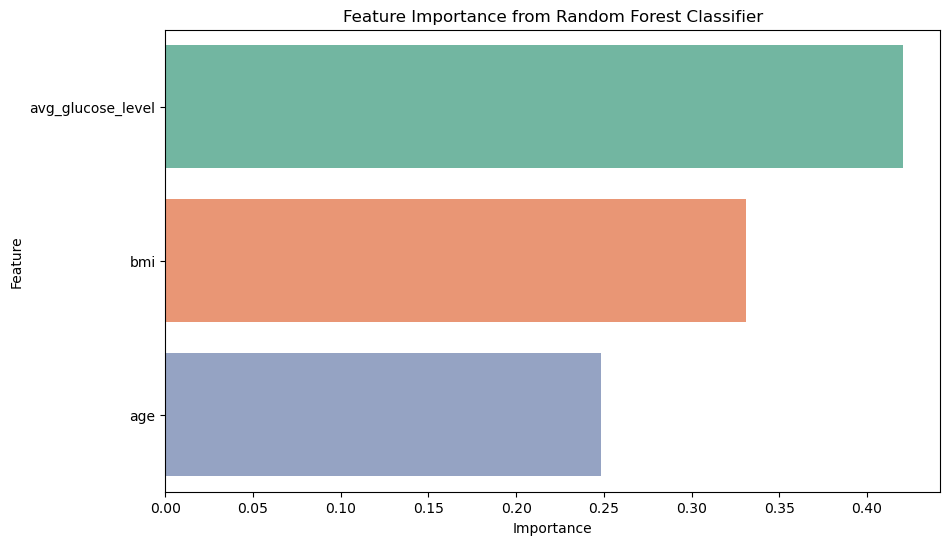

             Feature  Importance
0                age    0.248200
1  avg_glucose_level    0.420745
2                bmi    0.331055


In [58]:
# Define features and target variable
features = pd.DataFrame(traindata[["age", "avg_glucose_level", "bmi"]])
target = traindata['stroke']

# Initialize random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier
rf_classifier.fit(features, target)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to store feature importances
importance_df = pd.DataFrame({'Feature': features.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sb.barplot(x='Importance', y='Feature', data=importance_df, palette='Set2')
plt.title('Feature Importance from Random Forest Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Display the DataFrame
print(importance_df.sort_index())

#### Feature Importance Analysis:
This analysis aims to assess the significance of various features in predicting the target variable, which in this case is the likelihood of stroke occurrence. By employing a Random Forest Classifier, the model evaluates the importance of each feature and visualizes their relative contributions to the predictive accuracy.

The resulting visualization illustrates the importance of individual features, shedding light on their respective influences on the model's decision-making process. Features with higher importance values exert a more significant impact, guiding the model towards more accurate predictions.

In this specific analysis, the feature "avg_glucose_level" emerges as the most influential predictor of stroke occurrence, signifying its strong association with the target variable. With a feature importance value of 0.420, it demonstrates a substantial impact on the model's predictions. Following closely, "bmi" and "age" also contribute significantly, with importance values of 0.331 and 0.248, respectively.

These insights provide valuable guidance for understanding the underlying factors contributing to stroke.